In [2]:
#importing Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

# Importing Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Importing scit-Larn module for the algorithm/model: LInear Regression
from sklearn.linear_model import LinearRegression

# Importing scit-Learn module to split th edataset into train/test sub-datasets
from sklearn.model_selection import train_test_split

# Importing scit-learn module for K-fole corss-validation - algorith/model evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [3]:
# Loading Data set form data file
filename = 'C:/Data Sets/housing_boston.csv'

#Specifing the field with their names
names = ['CRIM', 'ZN', 'INDUS',  'CHAS', 'NOX',  'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading the data into a Pandas DataFrame
df = pd.read_csv(filename, names=names)

# VIP NOTES: [( ... )]
# Extract a sub-dtaaset from the original one --> dataframe: df2
df2 = df[['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV']]

In [4]:
# Preprocess the dataset by:

# 1. Cleaning the data - find and mark missing values

# if they exist we are marking them as zero values or NaN
df[['RM', 'PTRATIO', 'MEDV']] = df[['RM', 'PTRATIO', 'MEDV']].replace(0, np.NaN)

# count the number of NaN values in each column
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# Performing the exploratory data analysis (EDA) on the dataset 

# creating dimensions and Shapes of the dataset in number of records/rows and X number of variables/columns

print(df2.shape)

(452, 6)


In [6]:
# Performing the exploratory data analysis (EDA) on the dataset 

# get the data types of all the variables/attributes of the data set

# The results shows:

print(df2.dtypes)

RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


In [7]:
# Performing the exploratory data analysis (EDA) on the dataset 

# Getting several records/rows at the top of the dataset

# Getting the first five records

print(df2.head(5))

      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2


In [8]:
# Performing the exploratory data analysis (EDA) on the dataset 

print(df2.describe())

               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


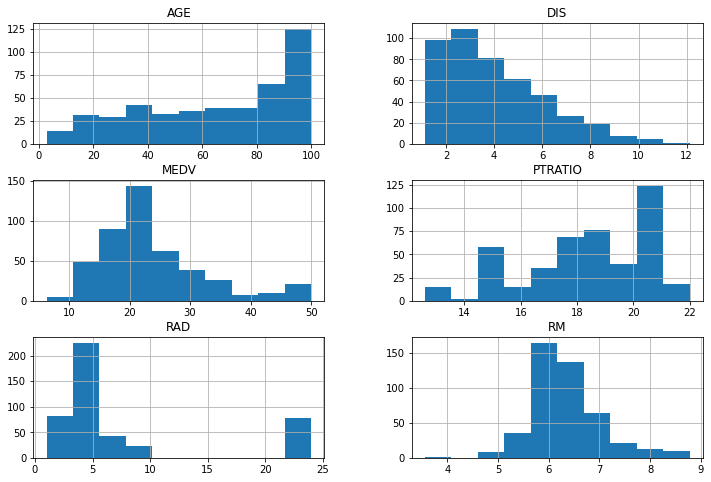

In [9]:
# Performing the exploratory data analysis (EDA) on the dataset 

# Plot histogram for each numeric variable/sttribute of the dataset

# VIP NOTES: The first variable ID is also plotted. However the plot should be ignored

df2.hist(figsize=(12, 8))
pyplot.show()

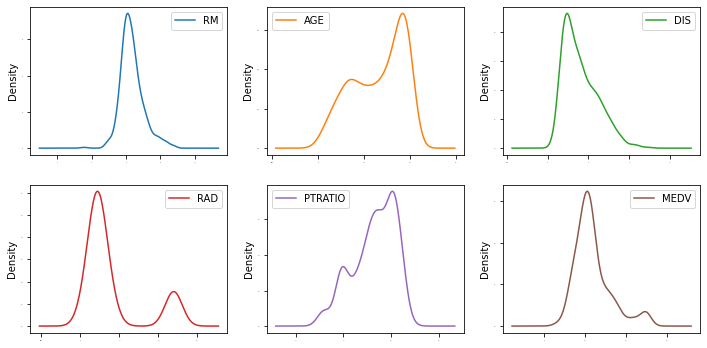

In [10]:
# Performing the exploratory data analysis (EDA) on the dataset 

# Density Plots

# IMPORTANT NOTES: 5 numeric variables --> at least 5 plots --> Layout (2, 3): 2 rows, each row with 3 plots

df2.plot(kind='density', subplots=True, layout=(2, 3), sharex=False, legend=True, fontsize=1, figsize=(12,6))
pyplot.show()

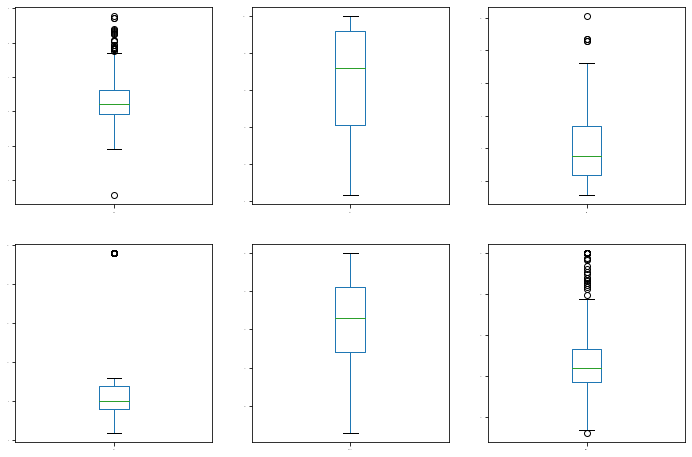

In [11]:
# Performing the exploratory data analysis (EDA) on the dataset 

# Box plots

df2.plot(kind='box', subplots=True, layout=(2, 3), sharex=False, legend=True, fontsize=1, figsize=(12,8))
pyplot.show()

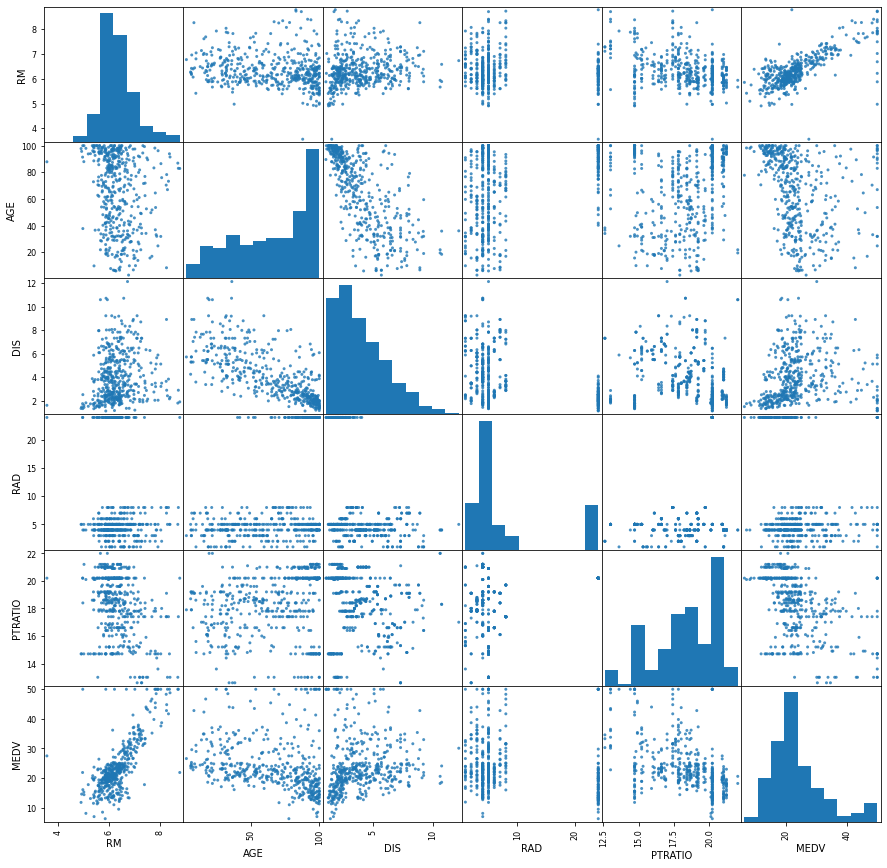

In [12]:
# Performing the exploratory data analysis (EDA) on the dataset 

# Scatter plot matrix

scatter_matrix(df2, alpha=0.8, figsize=(15, 15))

pyplot.show()

In [13]:
# Separating the dataset into the input and output NumPy arrays 

# Stor dataframe values into a numpy array
array = df2.values

# separating array inot input and output components by slicing

# For X (input)[:, 0:5] --> all the rows, columns form 0 - 4 (5 - 1)
X = array[:, 0:5]

# For Y (Output)[:, 5] --> all the rows, column index 5 (Last column)
Y = array[:, 5]

print(X,Y)

[[ 6.575  65.2     4.09    1.     15.3   ]
 [ 6.421  78.9     4.9671  2.     17.8   ]
 [ 7.185  61.1     4.9671  2.     17.8   ]
 ...
 [ 6.976  91.      2.1675  1.     21.    ]
 [ 6.794  89.3     2.3889  1.     21.    ]
 [ 6.03   80.8     2.505   1.     21.    ]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 

In [14]:
# Spliting the input/output arrays into the training/testing datasets 

# Spliting the dataset --> training sub-dataset: 67%; test sub-dataset: 33% test_size = 0.33
test_size = 0.33

# Selecting of records to include in which sub-dataset must be done randomely

# Applying this seed for randomizzation
seed = 7

# Split the dataseet (both input & output) into trining/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
# Building the model

model = LinearRegression()

# Training the model using the training sub-dataset
model.fit(X_train, Y_train)

# Printing out the coefficients and the intercept
# Printing intercept and coefficients
print (model.intercept_)
print (model.coef_)

-4.536021723609618
[ 8.45701265 -0.08160589 -0.80038663 -0.1426911  -0.86413873]


In [16]:
# Building and train the model 

# I am printingout the list of the coefficients with their correspondetn variable name

# pairing the feature names with the coefficients
names_2 = ['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']

coeffs_zip = zip(names_2, model.coef_)

# Converting iterator into set
coeffs = set(coeffs_zip)

# Printing (coeffs)
for coef in coeffs:
        print (coef, "\n")

('AGE', -0.08160589380401168) 

('RM', 8.457012650599346) 

('RAD', -0.14269109757375367) 

('PTRATIO', -0.8641387261012627) 

('DIS', -0.8003866254122636) 



In [17]:
#Calculating the R2 value 

R_squared = model.score(X_test, Y_test)

print(R_squared)

0.49212784664413745


In [21]:
# the model will predict the median value of owner-occupied homes in 1000 dollars in the above suburb should be around 23,000

# a. Record 1 • RM: average number of rooms per dwelling = 4 
# •	AGE: proportion of owner-occupied units built prior to 1940 = 45 
# •	DIS: weighted distances to five Boston employment centers = 5.7 
# •	RAD: index of accessibility to radial highways = 2.5 
# •	PTRATIO: pupil-teacher ratio by town = 15 

# RM, AGE, DIS, RAD, PTRATION
model.predict([[4, 45, 5.7, 2.5, 15]])

array([7.73875126])

In [28]:
# The model forcasts the median value for an owner occupied home in $1,000 
# in the selected surburb of Boston is approximatly $7,738.75


In [27]:
# the model will predict the median value of owner-occupied homes in 1000 dollars in the above suburb should be around 23,000

# b. Record 2 • RM: average number of rooms per dwelling = 5 
# •	AGE: proportion of owner-occupied units built prior to 1940 = 30 
# •	DIS: weighted distances to five Boston employment centers = 7 
# •	RAD: index of accessibility to radial highways = 4 
# •	PTRATIO: pupil-teacher ratio by town = 12 

# RM, AGE, DIS, RAD, PTRATION
model.predict([[5, 30, 7, 4, 12]])

array([18.75772923])

In [26]:
# The model forcasts the median value for an owner occupied home in $1,000 
# in the selected surburb of Boston is approximatly $18,757.73


In [25]:
#---------------Evaludate the algorithm
# Specify the K-size
num_folds = 10

# Fix the random seed
# Must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)
# For lienar regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'

# Train the odel and run K-fold cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Printing out the evaluation results

# Results: the average of all the reustls obtain from the k-fold croww-validation
print(results.mean())

-31.17777676938244


C:\ProgramData\Anaconda3.0\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
